In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv('DATA/cars_multivariate.csv')

In [5]:
cars[cars.horsepower.notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [10]:
cars['weight'].head()

0    3504.0
1    3693.0
2    3436.0
3    3433.0
4    3449.0
Name: weight, dtype: float64

In [13]:
squared_weight = cars['weight']**2

In [21]:
print(squared_weight)

0      12278016.0
1      13638249.0
2      11806096.0
3      11785489.0
4      11895601.0
          ...    
393     7784100.0
394     4536900.0
395     5267025.0
396     6890625.0
397     7398400.0
Name: weight, Length: 398, dtype: float64


In [24]:
print(cars['weight'])

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 398, dtype: float64


Text(0, 0.5, 'Weight Squared')

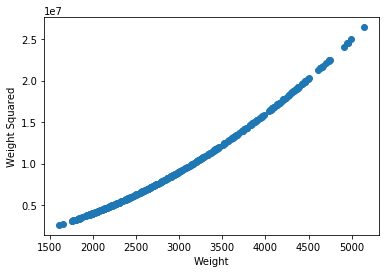

In [35]:
fig, ax = plt.subplots()

ax.scatter(cars.weight, squared_weight)
ax.set_xlabel("Weight")
ax.set_ylabel("Weight Squared")

In [46]:
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight'], 'weight squared': squared_weight})
X

,weight,weight squared
0,3504.0,12278016.0
1,3693.0,13638249.0
2,3436.0,11806096.0
3,3433.0,11785489.0
4,3449.0,11895601.0
...,...,...
393,2790.0,7784100.0
394,2130.0,4536900.0
395,2295.0,5267025.0
396,2625.0,6890625.0


In [47]:
X = sm.add_constant(X)
X

,const,weight,weight squared
0,1.0,3504.0,12278016.0
1,1.0,3693.0,13638249.0
2,1.0,3436.0,11806096.0
3,1.0,3433.0,11785489.0
4,1.0,3449.0,11895601.0
...,...,...,...
393,1.0,2790.0,7784100.0
394,1.0,2130.0,4536900.0
395,1.0,2295.0,5267025.0
396,1.0,2625.0,6890625.0


In [48]:
Y = cars['mpg']

In [49]:
regressor = sm.OLS(Y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     495.0
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          2.49e-108
Time:                        14:45:43   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     395   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             62.5167      2.971     21.042      0.000      56.676      68.358
weight            -0.0186      0.002     -9.517      0.000      -0.022      -0.015
weight squared  1.717e-06   3.04e-07      5.643      0.000    1.12e-06    2.31e-06
==============================================================================
Omnibus:                       51.743   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.990
Skew:                           0.784   Prob(JB):                     7.82e-20
Kurtosis:                       4.688   Cond. No.                     1.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""